<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Worrying-About-Overfitting" data-toc-modified-id="Worrying-About-Overfitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Worrying About Overfitting</a></span><ul class="toc-item"><li><span><a href="#Use-Train-Validation-Test" data-toc-modified-id="Use-Train-Validation-Test-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Use Train-Validation-Test</a></span></li><li><span><a href="#Model-Complexity-Graph" data-toc-modified-id="Model-Complexity-Graph-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model Complexity Graph</a></span><ul class="toc-item"><li><span><a href="#Early-Stopping" data-toc-modified-id="Early-Stopping-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Early Stopping</a></span></li></ul></li></ul></li><li><span><a href="#When-a-Good-Model-Goes-Bad" data-toc-modified-id="When-a-Good-Model-Goes-Bad-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>When a Good Model Goes Bad</a></span><ul class="toc-item"><li><span><a href="#L1-Regularization---Absolute-Value" data-toc-modified-id="L1-Regularization---Absolute-Value-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>L1 Regularization - Absolute Value</a></span></li><li><span><a href="#L2-Regularization---Squared-Value" data-toc-modified-id="L2-Regularization---Squared-Value-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>L2 Regularization - Squared Value</a></span></li><li><span><a href="#Comparing-L1-&amp;-L2-Regularization" data-toc-modified-id="Comparing-L1-&amp;-L2-Regularization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Comparing L1 &amp; L2 Regularization</a></span></li></ul></li><li><span><a href="#Dropout" data-toc-modified-id="Dropout-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dropout</a></span><ul class="toc-item"><li><span><a href="#Avoiding-the-Self-Perpetuating-Strength-Training" data-toc-modified-id="Avoiding-the-Self-Perpetuating-Strength-Training-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Avoiding the Self-Perpetuating Strength Training</a></span></li><li><span><a href="#Example-Code" data-toc-modified-id="Example-Code-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Example Code</a></span></li></ul></li></ul></div>

# Worrying About Overfitting

A big issue is making sure we don't overfit our model

## Use Train-Validation-Test

- Think of **training** as what you study for a test
- Think of **validation** is using a practice test (note sometimes called **dev**)
- Think of **testing** as what you use to judge the model 

> ***holdout*** is when your test dataset is never used for training (unlike in cross-validation)

> The **validation** & **test** sets should come from the same distribution.
>
> _Why would this matter?_

## Model Complexity Graph

- Underfitting
    + low complexity --> high bias, low variance
    + training error: large
    + testing error: large
- Overfitting
    + high complexity --> low bias, high variance
    + training error: low
    + testing error: large

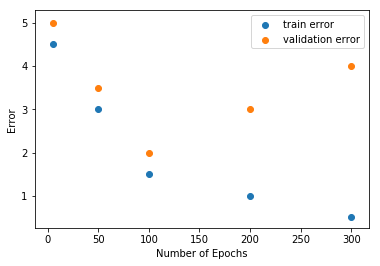

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

validation_error = np.array([5,3.5,2,3,4])
train_error = np.array([4.5,3,1.5,1,0.5])
n_epochs = np.array([5,50,100,200,300])

plt.scatter(n_epochs, train_error,)
plt.scatter(n_epochs, validation_error)
plt.legend(['train error','validation error'])
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.show()

### Early Stopping 

We train our model but only keep the best model it comes across. We can do this with a [ModelCheckpoint callback](https://keras.io/callbacks/#modelcheckpoint)

In [ ]:
from keras import callbacks

checkpoint = callbacks.ModelCheckpoint("best_model.h5",
                                             save_best_only=True
)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint]
)

# Now points to the best model found during the fit
model = keras.models.load_model("best_model.h5")

We can also stop our training early when our test error isn't really changing. We can do this with a [EarlyStopping callback](https://keras.io/callbacks/#earlystopping)

In [ ]:
from keras import callbacks

checkpoint = callbacks.EarlyStopping(monitor='val_loss', # What to watch
                                     min_delta=0.01, # How much change to get
                                     patience=5 # No change after 5 epochs
)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint]
)

# When a Good Model Goes Bad

When a model has large weights, the model is "too confident"

We need to punish large (confident) weights by contributing them to the error function

![](images/punishing_model_metaphor.jpg)

## L1 Regularization - Absolute Value

- Tend to get sparse vectors (small weights go to 0)
- Reduce number of weights
- Good feature selection to pick out importance

$$ J(W,b) = -\dfrac{1}{m} \sum^m_{i=1}\big[\mathcal{L}(\hat y_i, y_i)+ \dfrac{\lambda}{m}|w_i| \big]$$

## L2 Regularization - Squared Value

- Not sparse vectors (weights homogeneous & small)
- Tends to give better results for training

    
$$ J(W,b) = -\dfrac{1}{m} \sum^m_{i=1}\big[\mathcal{L}(\hat y_i, y_i)+ \dfrac{\lambda}{m}w_i^2 \big]$$

## Comparing L1 & L2 Regularization

> Typically you'll want to use L2 regularization 

+ subtle; consider vectors: [1,0] & [0.5, 0.5] 
+ recall we want smallest value for our value
+ L2 prefers [0.5,0.5] over [1,0] 

# Dropout

You want to even out your workouts, otherwise you may have some strange results...

<img src='images/homer-dropout-comparison.jpg'/>

Well, our neural network models are the same way. The model should get _evenly_ trained. We don't want to train the same node/pathway over and over again

## Avoiding the Self-Perpetuating Strength Training

When working out, we'd train our left and right arms evenly and switch our exercise routine throughout the week.

In neural networks, we switch around which nodes we use during our training.

Assign a probability of using a given node for that epoch (usually about 20% chance). When we have many epochs, we likely will even out the randomness

<img src='images/layered-neural-net.jpg'/>

## Example Code

In [2]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

n_classes = 10

model = Sequential()

# Input Layer
model.add(Dense(128, input_dim=100, activation='relu', name='input_layer'))
model.add(Dropout(0.2, name='input_dropout'))
# Hidden Layer
model.add(Dense(256, input_dim=100, activation='relu', name='hidden_layer1'))
model.add(Dropout(0.2, name='hidden_layer1_dropout'))
# Output Layer
model.add(Dense(n_classes, activation='softmax', name='output'))


model.summary()

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 128)               12928     
_________________________________________________________________
input_dropout (Dropout)      (None, 128)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               33024     
_________________________________________________________________
hidden_layer1_dropout (Dropo (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 48,522
Trainable params: 48,522
Non-trainable params: 0
_________________________________________________________________
